In [318]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels as sm2
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from statsmodels.compat import lzip
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [320]:
yen = pd.read_csv('china_currency.csv', parse_dates=True,infer_datetime_format= True)
yen.rename(columns={'ValueDate':'Date'}, inplace = True)
yen.rename(columns={'TheValue':'YEN/ZAR'}, inplace = True)
yen = yen.iloc[::-1]

In [22]:
dollar = pd.read_csv('us_currency.csv', parse_dates=True,infer_datetime_format= True)
dollar.rename(columns={'ValueDate':'Date'}, inplace = True)
dollar.rename(columns={'TheValue':'USD/ZAR'}, inplace = True)
dollar = dollar.iloc[::-1]

In [322]:
df_data = pd.read_csv('data.csv').drop('Unnamed: 0', axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 22 columns):
Date                       362 non-null object
company                    362 non-null object
current_price              362 non-null float64
momentum                   362 non-null float64
moving_average             362 non-null float64
moving_volatility          362 non-null float64
trading_range              362 non-null float64
target_return              362 non-null float64
exp_market_change          362 non-null float64
rates                      362 non-null float64
Revenue                    362 non-null float64
Cost_of_Sales              362 non-null float64
Gross_profit               362 non-null float64
Operating_profit           362 non-null float64
Net_Profit                 362 non-null float64
Issue_of_shares            362 non-null float64
Share_repurchase           362 non-null float64
Non_current_assets         362 non-null float64
Current_assets             362 no

In [323]:
df_data['Date'] = df_data['Date'].apply(lambda s:pd.to_datetime(s))
yen['Date'] = yen['Date'].apply(lambda s:pd.to_datetime(s))
dollar['Date'] = dollar['Date'].apply(lambda s:pd.to_datetime(s))

In [324]:
df_1 = df_data.merge(yen, how='left',left_on=['Date'],right_on=['Date'])
df = df_1.merge(dollar, how='left',left_on=['Date'],right_on=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 24 columns):
Date                       362 non-null datetime64[ns]
company                    362 non-null object
current_price              362 non-null float64
momentum                   362 non-null float64
moving_average             362 non-null float64
moving_volatility          362 non-null float64
trading_range              362 non-null float64
target_return              362 non-null float64
exp_market_change          362 non-null float64
rates                      362 non-null float64
Revenue                    362 non-null float64
Cost_of_Sales              362 non-null float64
Gross_profit               362 non-null float64
Operating_profit           362 non-null float64
Net_Profit                 362 non-null float64
Issue_of_shares            362 non-null float64
Share_repurchase           362 non-null float64
Non_current_assets         362 non-null float64
Current_assets           

#Checking for NA'S

In [325]:
df.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act,YEN/ZAR,USD/ZAR
0,2010-02-17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6,0.8919,7.6618
1,2010-05-06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6,0.8931,7.6436
2,2010-08-11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0,0.9331,7.2590
3,2010-11-10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6,0.9667,6.8635
4,2011-02-16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5,0.9012,7.3116


In [326]:
print(df.isnull().sum())

Date                       0
company                    0
current_price              0
momentum                   0
moving_average             0
moving_volatility          0
trading_range              0
target_return              0
exp_market_change          0
rates                      0
Revenue                    0
Cost_of_Sales              0
Gross_profit               0
Operating_profit           0
Net_Profit                 0
Issue_of_shares            0
Share_repurchase           0
Non_current_assets         0
Current_assets             0
Non_current_liabilities    0
Current_liabilities        0
net_cash_op_act            0
YEN/ZAR                    0
USD/ZAR                    0
dtype: int64


In [327]:
df_outliers  = pd.DataFrame(df['target_return'])
outlier = df_outliers[(np.abs(df_outliers.target_return-df_outliers.target_return.mean())>(3*df_outliers.target_return.std()))]
outlier


,target_return
15,-0.448740
18,-0.434443
20,0.493613
145,-0.362583
151,0.540323


In [328]:
#df.drop([185,225,273,336,375,417,432,458,478,575,576],inplace=True)
df.drop([15,18,20,145,151],inplace=True)

In [329]:
# Lables
y = df['target_return']
print(y.size)
# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)
#X = df.drop(['Date', 'company_symbol', 'target_return'], axis=1)

357


In [330]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 361
Data columns (total 21 columns):
current_price              357 non-null float64
momentum                   357 non-null float64
moving_average             357 non-null float64
moving_volatility          357 non-null float64
trading_range              357 non-null float64
exp_market_change          357 non-null float64
rates                      357 non-null float64
Revenue                    357 non-null float64
Cost_of_Sales              357 non-null float64
Gross_profit               357 non-null float64
Operating_profit           357 non-null float64
Net_Profit                 357 non-null float64
Issue_of_shares            357 non-null float64
Share_repurchase           357 non-null float64
Non_current_assets         357 non-null float64
Current_assets             357 non-null float64
Non_current_liabilities    357 non-null float64
Current_liabilities        357 non-null float64
net_cash_op_act            357 

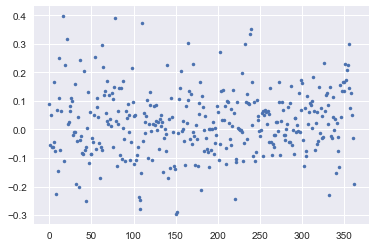

In [331]:
#Plot of the Returns
plt.plot(y,'.')

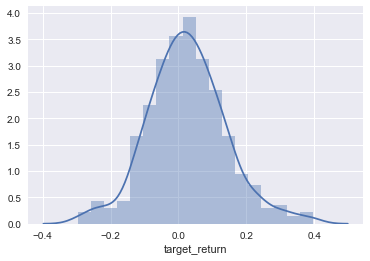

In [332]:
#Distribution of Returns
sns.distplot(y)

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Please note 
Given that we do not have a validation data set to select the best model which we would then subsequently test on the unseen data we have taken the following steps. 
- Created a data frame to collect statistics when training the model on the in sample(training) data 
- Created another data frame that collects statistics when testing the models on the out of sample(testing) data 

We then graphically compare how misleading choosing a model based on our "train and validate" data set could be 

In [334]:
def processSubset(feature_set):
    # feature_set would be a tupile and should be converted to a list
    # Fit model on the predictors and calculate RSS 
    list_of_features = list(feature_set)    
    model = sm.OLS(y_train,X_train[list_of_features])
    regr = model.fit()
    predictions = regr.predict(X_test[list_of_features])
    
    #Statistics of interest
    MSE = metrics.mean_squared_error(y_test,predictions)
    RSS = ((predictions - y_test) ** 2).sum()
    
    return {"RSS on Testing":RSS, "MSE on Testing":MSE,"model":regr}

In [1]:
def processSubset_correct(feature_set):
    # feature_set would be a tupile and should be converted to a list
    # Fit model on the predictors and calculate RSS 
    list_of_features = list(feature_set)
    
    #data =  X_train[list_of_features]
    #data = sm.add_constant(data)
    
    #list_of_features = sm.add_constant(list_of_features)
    #model = sm.OLS(y_train,X_train[list_of_features])
    
    regr = sm.OLS(y_train,sm2.tools.add_constant(X_train[list_of_features])).fit()
    #regr = model.fit()
    predictions = regr.predict(sm2.tools.add_constant(X_test[list_of_features]))
    
    #Statistics of interest
    MSE = metrics.mean_squared_error(y_test,predictions)
    RSS = ((predictions - y_test) ** 2).sum()
    
    return {"RSS on Testing":RSS, "MSE on Testing":MSE,"model":regr}

In [ ]:
processSubset_correct(

In [336]:
#Function that selects the best combination of k number of predictors
def getBest(k):
    
    results = []
    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset_correct(combo))
    
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS 
    best_model = models.loc[models['RSS on Testing'].argmin()]

    print("Processed ", models.shape[0], "models on", k, "predictors")
    
    # Return the best model
    return best_model

In [337]:
def adj_r2_score_regr(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.params)-1)
    return adj

Testing how well the given model would be able to predict using data but only for regular regression models and not the regression models with regularizaion there is a separate function for regularized models

In [338]:
def Out_of_Sample_Testing(model):
    parameters = model.params
    index = parameters.keys()
    keys = []
    for k in index:
        keys.append(k)
    df_temp = pd.DataFrame(X_test[keys])
    
    predictions = model.predict(df_temp)

    MSE = metrics.mean_squared_error(y_test,predictions)

    RSS = ((predictions  - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    R2_adj = adj_r2_score_regr(model,y_test,predictions)
    

    return [RSS,MSE,R2,R2_adj]

In [339]:
def Out_of_Sample_Testing_old(model):
    parameters = model.params
    index = parameters.keys()
    keys = []

    for k in index:
        if k !='const':
            keys.append(k)
            
 
    predictions = model.predict(sm2.tools.add_constant(X_test[keys]))

    MSE = metrics.mean_squared_error(y_test,predictions)

    RSS = ((predictions  - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    R2_adj = adj_r2_score_regr(model,y_test,predictions)
  
    return [RSS,MSE,R2,R2_adj]


In [340]:
#Finding the best model and simultaneously testing on the out of sample data
def grid_Search(k):
    models = pd.DataFrame(columns=["RSS on Testing", "MSE on Testing", "model"])
    models_OutOfSample = pd.DataFrame(columns=["RSS","MSE","R2","R2_adj"])
    
    for i in range(1,(k+1)):
        best = getBest(i)
        models.loc[i] = best
        models_OutOfSample.loc[i] = Out_of_Sample_Testing_old(best[2])
    
    return {"models_InSample":models , "models_OutOfSample":models_OutOfSample}

In [356]:
models_Grid = grid_Search(8)

Processed  21 models on 1 predictors
Processed  210 models on 2 predictors


KeyboardInterrupt: 

# Forward Selection

In [341]:
def forward(predictors):

    # predictors we still need to process
    #remaining_predictors = [p for p in X.columns if p not in predictors]
    remaining_predictors = [p for p in X.columns if (p not in predictors) and (p != 'const')]
    
    results = []
    
    for p in remaining_predictors:
        if p != 'const':
            results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS on Testing'].argmin()]
    
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors")
    
    # Return the best model
    return best_model

In [342]:
#Finding the best model and simultaneously testing on the out of sample data
def stepwise_forward():
    models_F = pd.DataFrame(columns=["RSS on Testing","MSE on Testing","model"])
    models_F_OutOfSample = pd.DataFrame(columns=["RSS","MSE","R2","R2_adj"])

    predictors = []

    for i in range(1,len(X.columns)+1):
        best = forward(predictors)
        models_F.loc[i] = best
        models_F_OutOfSample.loc[i] = Out_of_Sample_Testing(best[2])
        predictors = models_F.loc[i]["model"].model.exog_names
    return {"models_Forward_InSample":models_F , "models_Forward_OutOfSample":models_F_OutOfSample}
models_Forward = stepwise_forward()

Processed  21 models on 1 predictors
Processed  20 models on 2 predictors
Processed  19 models on 3 predictors
Processed  18 models on 4 predictors
Processed  17 models on 5 predictors
Processed  16 models on 6 predictors
Processed  15 models on 7 predictors
Processed  14 models on 8 predictors
Processed  13 models on 9 predictors
Processed  12 models on 10 predictors
Processed  11 models on 11 predictors
Processed  10 models on 12 predictors
Processed  9 models on 13 predictors
Processed  8 models on 14 predictors
Processed  7 models on 15 predictors
Processed  6 models on 16 predictors
Processed  5 models on 17 predictors
Processed  4 models on 18 predictors
Processed  3 models on 19 predictors
Processed  2 models on 20 predictors
Processed  1 models on 21 predictors


In [317]:
modelGrid5 = getBest(5)

In [ ]:
modelGrid5['model'].summary()

In [344]:
#model6Forward.summary()

In [87]:
list_of_features = ['YEN/ZAR','rates','exp_market_change','USD/ZAR','moving_volatility','current_price']
model6Forward = sm.OLS(y_train,sm2.tools.add_constant(X_train[list_of_features])).fit()
predictions = model6Forward.predict(sm2.tools.add_constant(X_test[list_of_features]))
MSE = metrics.mean_squared_error(y_test,predictions)
print(MSE)
RSS = ((predictions - y_test) ** 2).sum()
print(RSS)
R2 = r2_score(y_test,predictions)
print(R2)
R2_adj = adj_r2_score_regr(model6Forward ,y_test,predictions)
print(R2_adj)

0.012767458627
1.3788855317190742
0.0961476844708
0.0328780223838


In [227]:
Out_of_Sample_Testing_old(model6Forward)

before


[1.3788855317190742,
 0.012767458627028468,
 0.096147684470845762,
 0.032878022383804884]

# Backward Selection

In [347]:
def backward(predictors):
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS on Testing'].argmin()]
    
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors")
    
    # Return the best model
    return best_model

In [348]:
def backward_pvalue(threshold):
    predictors = list(X_train.columns.values)
    backward_phase = processSubset(predictors)
    max_p = backward_phase['model'].pvalues[backward_phase['model'].pvalues == backward_phase['model'].pvalues.max()]
    while max_p[0] > threshold:
        max_p_name = max_p.index[0]
        #print(max_p_name)
        #print(max_p[0])
        best_pridictors = predictors
        predictors.pop(predictors.index(max_p.index[0]))
        backward_phase = processSubset(predictors)
        max_p = backward_phase['model'].pvalues[backward_phase['model'].pvalues == backward_phase['model'].pvalues.max()]
    return best_pridictors
b = backward_pvalue(0.05)

In [349]:
backward_model = sm.OLS(y_train,X_train[b])
regr = backward_model.fit()
predictions = regr.predict(X_train[b])
MSE = metrics.mean_squared_error(y_train,predictions)
RSS = ((predictions - y_train) ** 2).sum()
print(MSE)
print(RSS)
Out_of_Sample_Testing(regr)

0.0125141691973
3.116028130118388


[1.561570046358429,
 0.014458981910726199,
 -0.023601067524719577,
 -0.043098230715666652]

In [350]:
def backward_pvalue(predictors):
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS on Training'].argmin()]
    
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors")
    
    # Return the best model
    return best_model

In [351]:
#Finding the best model and simultaneously testing on the out of sample data
def stepwise_backward():
    models_Backward = pd.DataFrame(columns=["RSS on Testing","MSE on Testing","model"], index = range(1,len(X_train.columns)))
    models_Backward_OutOfSample = pd.DataFrame(columns=["RSS","MSE","R2","R2_adj"])
    
    predictors = X_train.columns

    while(len(predictors) > 1): 
        best = backward(predictors)
        models_Backward.loc[len(predictors)-1] = best
        models_Backward_OutOfSample.loc[len(predictors)-1] = Out_of_Sample_Testing(best[2])
        predictors = models_Backward.loc[len(predictors)-1]["model"].model.exog_names
        
    return {"models_Backward_InSample": models_Backward , "models_Backward_OutOfSample": models_Backward_OutOfSample}
models_Backward = stepwise_backward()      

Processed  21 models on 20 predictors
Processed  20 models on 19 predictors
Processed  19 models on 18 predictors
Processed  18 models on 17 predictors
Processed  17 models on 16 predictors
Processed  16 models on 15 predictors
Processed  15 models on 14 predictors
Processed  14 models on 13 predictors
Processed  13 models on 12 predictors
Processed  12 models on 11 predictors
Processed  11 models on 10 predictors
Processed  10 models on 9 predictors
Processed  9 models on 8 predictors
Processed  8 models on 7 predictors
Processed  7 models on 6 predictors
Processed  6 models on 5 predictors
Processed  5 models on 4 predictors
Processed  4 models on 3 predictors
Processed  3 models on 2 predictors
Processed  2 models on 1 predictors


In [352]:
#Plotting the statistics for each model based on the in sample data 
def WoodstockBulls(models): 
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2, 2, 1)

    plt.plot(models["RSS on Training"])
    plt.xlabel('No. of Predictors')
    plt.ylabel('RSS on Training')
    

    rsquared_adj = models.apply(lambda col: col[2].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('No. of Predictors')
    plt.ylabel('adjusted rsquared')

    aic = models.apply(lambda col: col[2].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(aic.argmin(), aic.min(), "or")
    plt.xlabel('No. of Predictors')
    plt.ylabel('AIC')

    bic = models.apply(lambda col: col[2].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(bic.argmin(), bic.min(), "or")
    plt.xlabel('No. of Predictors')
    plt.ylabel('BIC')

In [353]:
#Plotting the statistics for each model based on the out of sample data 
def WoodstockBulls_OutOfSample(models): 
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2, 2, 1)

    plt.plot(models["RSS"])
    plt.xlabel('No. of Predictors')
    plt.ylabel('RSS on Testing')

    plt.subplot(2, 2, 2)
    plt.plot(models["MSE"])
    plt.xlabel('No. of Predictors')
    plt.ylabel('MSE on Testing')
    
    
    plt.subplot(2, 2, 3)
    plt.plot(models["R2"])
    plt.plot(models["R2"].argmax(), models["R2"].max(), "or")
    plt.xlabel('No. of Predictors')
    plt.ylabel('R^2 on Testing')
    
    plt.subplot(2, 2, 4)
    plt.plot(models["R2_adj"])
    plt.plot(models["R2_adj"].argmax(), models["R2_adj"].max(), "or")
    plt.xlabel('No. of Predictors')
    plt.ylabel('R^2 Adjusted on Testing')
    

In [457]:
#WoodstockBulls(models_Grid['models_InSample'])


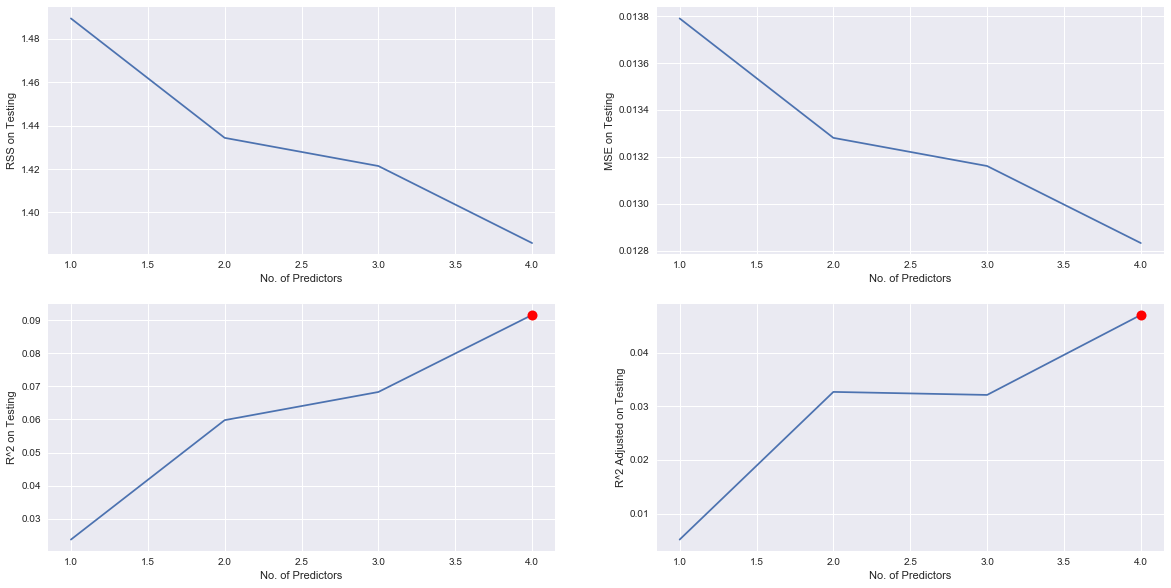

In [458]:
WoodstockBulls_OutOfSample(models_Grid['models_OutOfSample'])

In [459]:
#WoodstockBulls(models_Forward['models_Forward_InSample'])

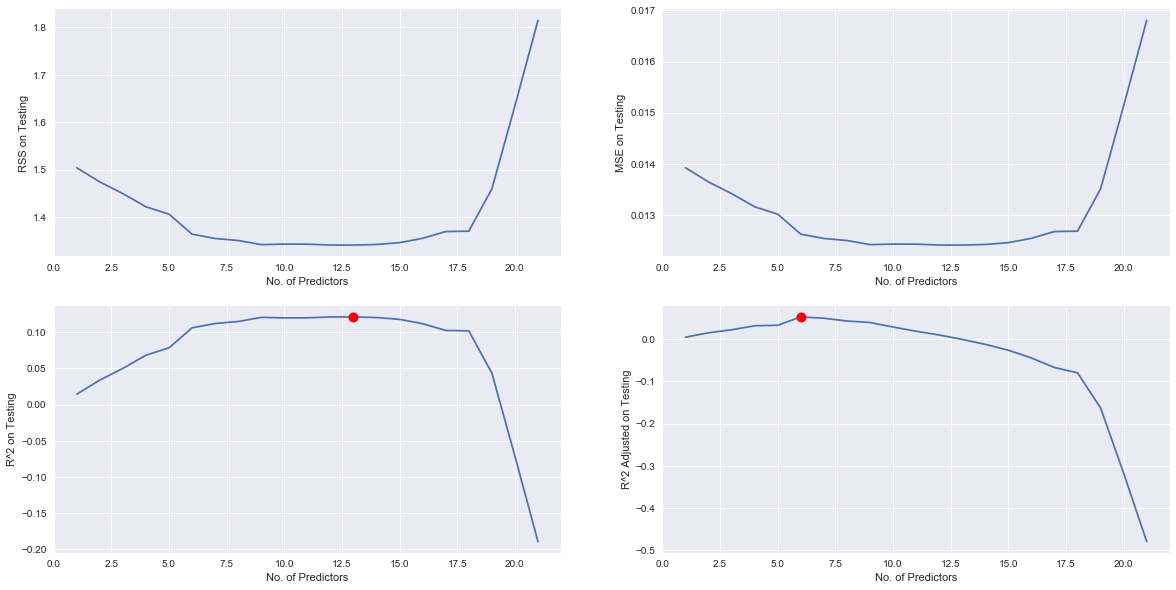

In [354]:
WoodstockBulls_OutOfSample(models_Forward['models_Forward_OutOfSample'])

In [461]:
#WoodstockBulls(models_Backward)
#WoodstockBulls(models_Backward['models_Backward_InSample'])

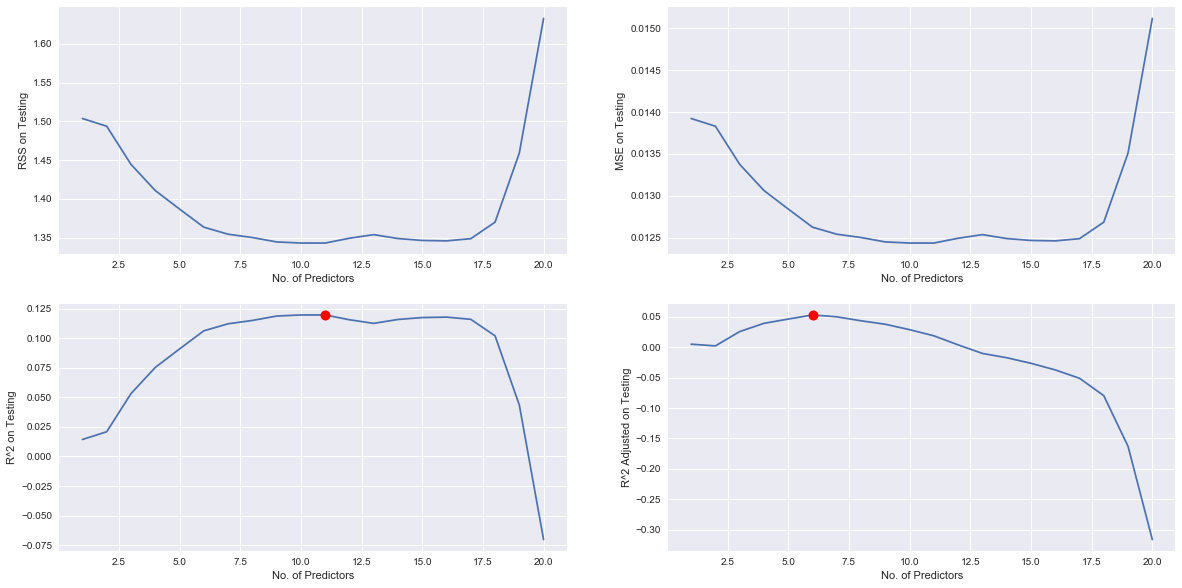

In [462]:
WoodstockBulls_OutOfSample(models_Backward['models_Backward_OutOfSample'])

# Regularization 

In [464]:
alphas = 10**np.linspace(-10,10,20)
alphas
#np.log(alphas)

array([  1.00000000e-10,   1.12883789e-09,   1.27427499e-08,
         1.43844989e-07,   1.62377674e-06,   1.83298071e-05,
         2.06913808e-04,   2.33572147e-03,   2.63665090e-02,
         2.97635144e-01,   3.35981829e+00,   3.79269019e+01,
         4.28133240e+02,   4.83293024e+03,   5.45559478e+04,
         6.15848211e+05,   6.95192796e+06,   7.84759970e+07,
         8.85866790e+08,   1.00000000e+10])

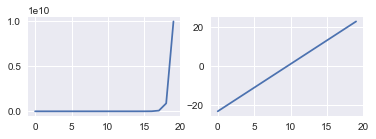

In [465]:
plt.subplot(2, 2, 1)
plt.plot(alphas)
plt.subplot(2, 2, 2)
plt.plot(np.log(alphas))

In [466]:
def adj_r2_score(model,y,yhat):
    
    count = 0
    for j in model.coef_:
        if j != float(0): #0.0
            count += 1 
    
    adj = 1 - ((1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-count-1))
    return adj

In [467]:
def ridgeReg(alpha):
    ridge = Ridge(normalize=True)
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,predictions)
    RSS = ((predictions - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    Coeficients  = ridge.coef_
    R2_adj = adj_r2_score(ridge,y_test,predictions)
    #return {"Ridge model":ridge, "RSS on testing":RSS, "MSE on testing":MSE, "Coefficients":Coeficients}
    return [alpha,ridge,RSS,MSE,R2,R2_adj,Coeficients]
#ridgeReg(0.001)

In [468]:
#Lasso
def lassoReg(alpha):
    lasso = Lasso(normalize=True,max_iter=10000)
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,predictions)
    RSS = ((predictions - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    Coeficients  = lasso.coef_
    R2_adj = adj_r2_score(lasso,y_test,predictions)
    
    #return {"Ridge model":ridge, "RSS on testing":RSS, "MSE on testing":MSE, "Coefficients":Coeficients}
    return [alpha,lasso,RSS,MSE,R2,R2_adj,Coeficients]

#lassoReg(0.001)

In [469]:
def elasticNetReg(alpha):
    elastic = ElasticNet(normalize=True,max_iter=10000)
    elastic.set_params(alpha=alpha)
    elastic.fit(X_train, y_train)
    predictions = elastic.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,predictions)
    RSS = ((predictions - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    Coeficients  = elastic.coef_
    R2_adj = adj_r2_score(elastic,y_test,predictions)
    
    #return {"Ridge model":ridge, "RSS on testing":RSS, "MSE on testing":MSE, "Coefficients":Coeficients}
    return [alpha,elastic,RSS,MSE,R2,R2_adj,Coeficients]
#elasticNetReg(0.001)

Testing how well the given regularized model would be able to predict using data but only for  the regression models with regularizaion there is a separate function for normal regression models.

In [470]:
def testing_regularization(regularization_model,alpha):
    predictions = regularization_model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,predictions)
    
    RSS = ((predictions  - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    R2_adj = adj_r2_score(regularization_model,y_test,predictions)
    
    #return {"RSS on testing":RSS, "MSE on testing":MSE , "R2 on testing":R2 , "R2-adj on testing":R2_adj}
    #return df_temp
    return [alpha,RSS,MSE,R2,R2_adj]

In [471]:
#Finding the best regularized model and simultaneously testing on the out of sample data
def ridgeReg_df(alphas):
    models_ridge_InSample = pd.DataFrame(columns=["Alpha","Ridge Model","RSS on Testing","MSE on Testing","R2","R2_adj","Coefficients"], index = range(0,len(alphas)))
    
    models_ridge_OutOfSample = pd.DataFrame(columns=["Alpha","RSS","MSE","R2","R2_adj"], index = range(0,len(alphas)))
    j = len(alphas)
    i = 0
    for a in alphas:
        #assert (i < j)
        if(i < j):
            models_ridge_InSample.loc[i] = ridgeReg(a)
            models_ridge_OutOfSample.loc[i] = testing_regularization(ridgeReg(a)[1],a)
            i +=1
    return {"Ridge_InSample":models_ridge_InSample , "Ridge_OutOfSample":models_ridge_OutOfSample}


In [472]:
#Finding the best regularized model and simultaneously testing on the out of sample data
def lassoReg_df(alphas):
    models_lasso_InSample = pd.DataFrame(columns=["Alpha","Lasso Model","RSS on Testing","MSE on Testing","R2","R2_adj","Coefficients"], index = range(0,len(alphas)))
    
    models_lasso_OutOfSample = pd.DataFrame(columns=["Alpha","RSS","MSE","R2","R2_adj"], index = range(0,len(alphas)))
    
    j = len(alphas)
    i = 0
    for a in alphas:
        #assert (i < j)
        if(i < j):
            models_lasso_InSample.loc[i] = lassoReg(a)
            models_lasso_OutOfSample.loc[i] = testing_regularization(lassoReg(a)[1],a)
            i +=1
    #return models_lasso_OutOfSample
    return {"lasso_InSample":models_lasso_InSample , "lasso_OutOfSample":models_lasso_OutOfSample}


In [473]:
#Finding the best regularized model and simultaneously testing on the out of sample data
def elasticNetReg_df(alphas):
    models_elasticNet_InSample = pd.DataFrame(columns=["Alpha","Elastic Model","RSS on Testing","MSE on Testing","R2","R2_adj","Coefficients"], index = range(0,len(alphas)))
    
    models_elasticNet_OutOfSample = pd.DataFrame(columns=["Alpha","RSS","MSE","R2","R2_adj"], index = range(0,len(alphas)))
    j = len(alphas)
    i = 0
    for a in alphas:
        #assert (i < j)
        if(i < j):
            models_elasticNet_InSample.loc[i] = elasticNetReg(a)
            #models_elasticNet_OutOfSample.loc[i]["Alpha"] = a 
            models_elasticNet_OutOfSample.loc[i] = testing_regularization(elasticNetReg(a)[1],a)
            i +=1
    #return models_elasticNet
    return {"elastic_InSample":models_elasticNet_InSample , "elastic_OutOfSample":models_elasticNet_OutOfSample}

In [474]:
ridge_Grid = ridgeReg_df(alphas)
lasso_Grid = lassoReg_df(alphas) 
elasticNet_Grid = elasticNetReg_df(alphas) 


/Users/Ludwe/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

In [475]:
#Plotting the statistics for each model based on the in sample data 
def WoodstockBulls_regularization_Insample(models): 
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2, 2, 1)
    
    a_rss = models[models["RSS on Testing"] == models["RSS on Testing"].min()]['Alpha'].iloc[0]

    
    plt.plot(np.log(alphas), models["RSS on Testing"])

    plt.plot(np.log(a_rss),models["RSS on Testing"].min(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('RSS on Testing')

    plt.subplot(2, 2, 2)
    a_mse = models[models["MSE on Testing"] == models["MSE on Testing"].min()]['Alpha'].iloc[0]
    
    plt.plot(np.log(alphas),models["MSE on Testing"])
    plt.plot(np.log(a_mse),models["MSE on Testing"].min(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('MSE on Testing')
    
    #r = models["R2"].max()
    a = models[models["R2"] == models["R2"].max()]['Alpha'].iloc[0]
    
    plt.subplot(2, 2, 3)
    plt.plot(np.log(alphas),models["R2"])
    plt.plot(np.log(a),models["R2"].max(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('R^2 on Testing')
    
    #r_adj = models["R2_adj"].max()
    a_adj = models[models["R2_adj"] == models["R2_adj"].max()]['Alpha'].iloc[0]
    
    plt.subplot(2, 2, 4)
    plt.plot(np.log(alphas),models["R2_adj"])
    #plt.plot(models["R2_adj"].argmax(), models["R2_adj"].max(), "or")
    plt.plot(np.log(a_adj),models["R2_adj"].max(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('R^2 Adjusted on Testing')
    

In [476]:
#Plotting the statistics for each model based on the out of sample data 
def WoodstockBulls_regularization_OutOfSample(models): 
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2, 2, 1)
    a_rss = models[models["RSS"] == models["RSS"].min()]['Alpha'].iloc[0]
    plt.plot(np.log(alphas),models["RSS"])
    plt.plot(np.log(a_rss),models["RSS"].min(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('RSS on Testing')

    plt.subplot(2, 2, 2)
    a_mse = models[models["MSE"] == models["MSE"].min()]['Alpha'].iloc[0]
    plt.plot(np.log(alphas),models["MSE"])
    plt.plot(np.log(a_mse),models["MSE"].min(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('MSE on Testing')
    
    
    plt.subplot(2, 2, 3)
    a = models[models["R2"] == models["R2"].max()]['Alpha'].iloc[0]
    plt.plot(np.log(alphas),models["R2"])
    #plt.plot(models["R2"].argmax(), models["R2"].max(), "or")
    plt.plot(np.log(a),models["R2"].max(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('R^2 on Testing')
    
    plt.subplot(2, 2, 4)
    a_adj = models[models["R2_adj"] == models["R2_adj"].max()]['Alpha'].iloc[0]
    plt.plot(np.log(alphas),models["R2_adj"])
    plt.plot(np.log(a_adj),models["R2_adj"].max(), "or")
    #plt.plot(models["R2_adj"].argmax(), models["R2_adj"].max(), "or")
    plt.xlabel('log(alpha)')
    plt.ylabel('R^2 Adjusted on Testing')
    

In [482]:
#WoodstockBulls_regularization_Insample(ridge_Grid["Ridge_InSample"])

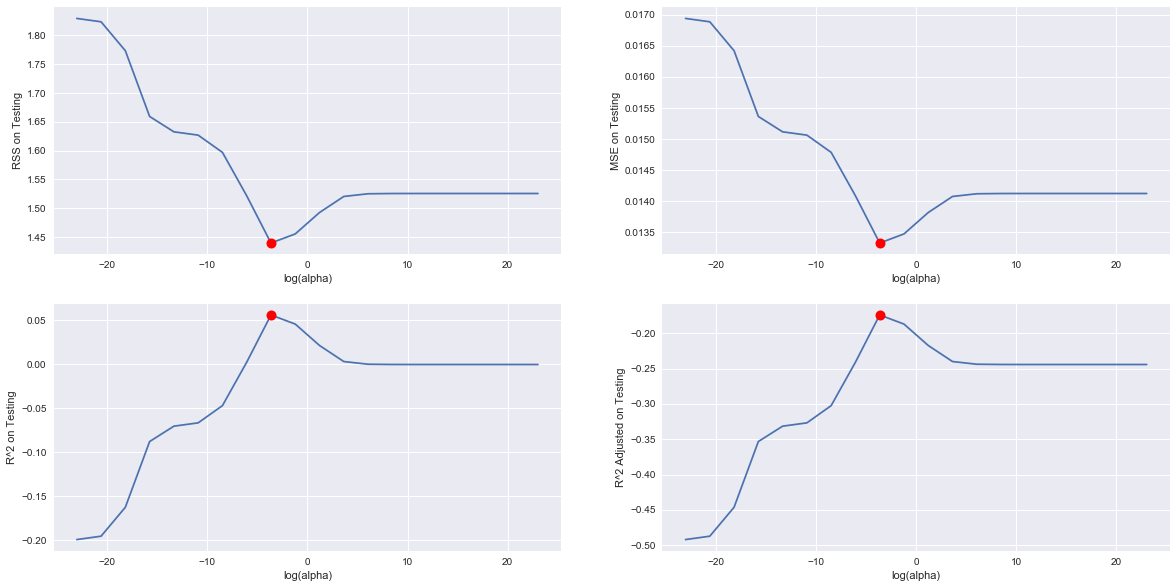

In [483]:
WoodstockBulls_regularization_OutOfSample(ridge_Grid["Ridge_OutOfSample"])

In [484]:
#Rounded off Weights for each predictor just checking it out 
#Not using this 
#ridge_Grid.loc[1, 'Coefficients'].round(2)

In [485]:
#WoodstockBulls_regularization_Insample(lasso_Grid['lasso_InSample'])

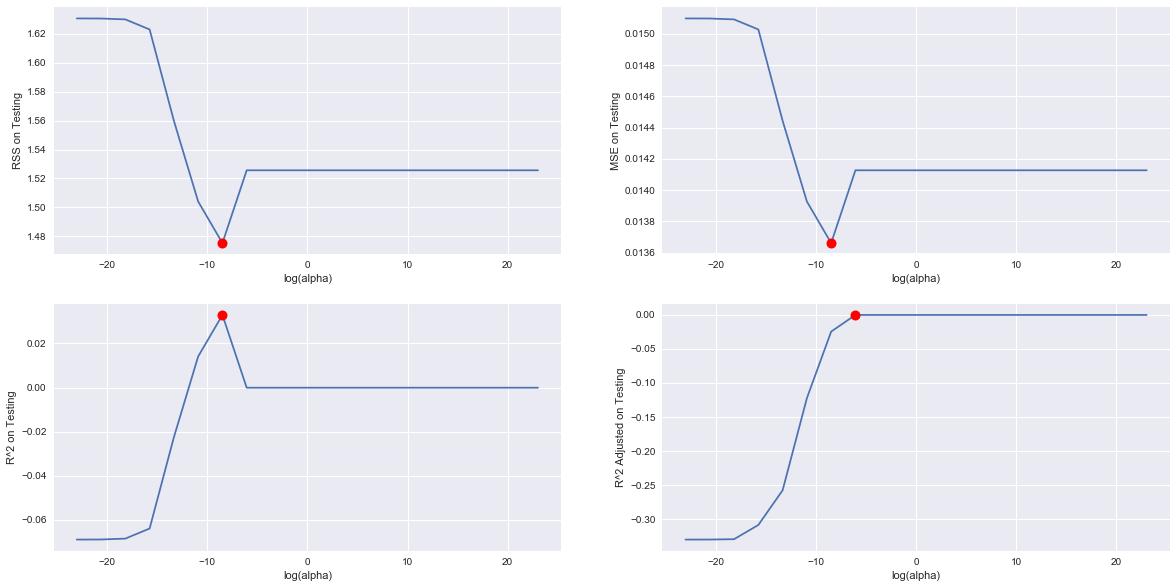

In [486]:
WoodstockBulls_regularization_OutOfSample(lasso_Grid['lasso_OutOfSample'])

In [487]:
#WoodstockBulls_regularization_Insample(elasticNet_Grid['elastic_InSample'])

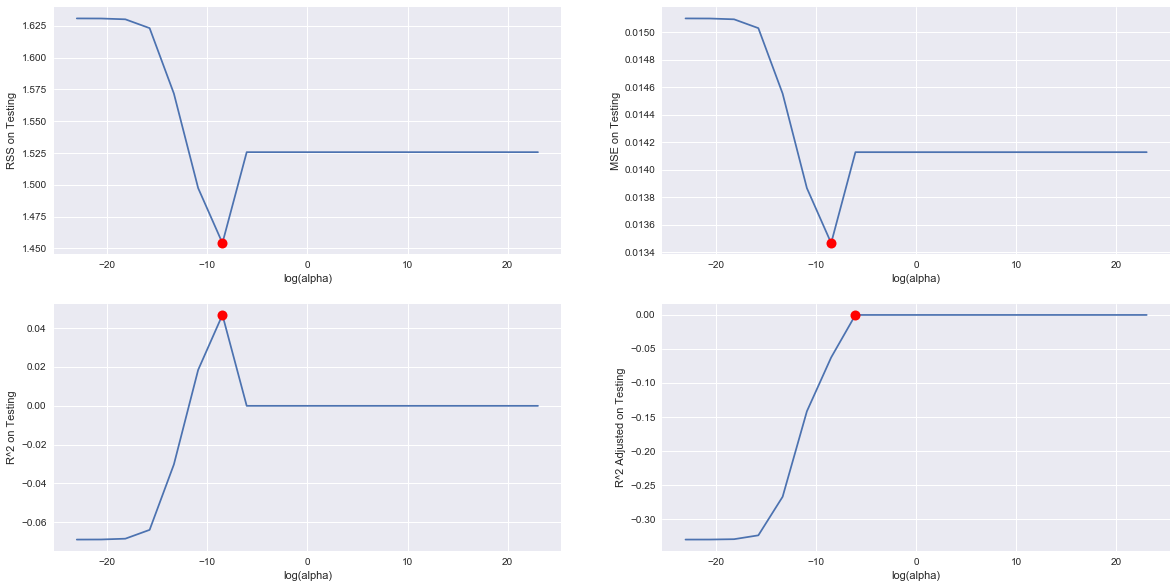

In [488]:
WoodstockBulls_regularization_OutOfSample(elasticNet_Grid['elastic_OutOfSample'])

# Summary 
Using the graphical illustrations for the Out Of Sample data of the metrics we selected the best models
Models_Grid = 1 
Models_Forward = 6
Models_Back = 6 
Ridge = 9
Lasso = 5 
Elastic net = 6

In [489]:
models_Grid['models_OutOfSample'].iloc[5]

RSS       1.385923
MSE       0.012833
R2        0.091535
R2_adj    0.047002
Name: 4, dtype: float64

In [490]:
models_Forward['models_Forward_OutOfSample'].iloc[6]

RSS       1.354346
MSE       0.012540
R2        0.112233
R2_adj    0.050089
Name: 7, dtype: float64

In [491]:
models_Backward['models_Backward_OutOfSample'].iloc[9]

RSS       1.342928
MSE       0.012435
R2        0.119718
R2_adj    0.018852
Name: 11, dtype: float64

In [492]:
#[1.8746743760751519,
# 0.017198847486927994,
# -0.048867586663828844,
# -0.089208647689360765]

In [493]:
ridge_Grid["Ridge_OutOfSample"].iloc[9]

Alpha      0.297635
RSS         1.45552
MSE       0.0134771
R2        0.0459119
R2_adj    -0.187063
Name: 9, dtype: object

In [494]:
lasso_Grid['lasso_OutOfSample'].iloc[5]

Alpha     1.83298e-05
RSS           1.50407
MSE         0.0139266
R2          0.0140907
R2_adj      -0.122258
Name: 5, dtype: object

In [495]:
elasticNet_Grid['elastic_OutOfSample'].iloc[6]

Alpha     0.000206914
RSS           1.45425
MSE         0.0134653
R2           0.046745
R2_adj     -0.0624822
Name: 6, dtype: object

In [496]:
models_Forward['models_Forward_OutOfSample'].iloc[6]

RSS       1.354346
MSE       0.012540
R2        0.112233
R2_adj    0.050089
Name: 7, dtype: float64

# The Best Model
Suprisingly the statistics from data seem to suggest best model is a forward selection with 6 variables we were expecting it to be one of the regularized models between the lasso and the elestic net.

Furthermore, the model does not include market expectation as a variable

In [502]:
models_Grid['models_InSample']['model'].iloc[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          target_return   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.815
Date:                Thu, 26 Apr 2018   Prob (F-statistic):            0.00500
Time:                        02:06:28   Log-Likelihood:                 195.43
No. Observations:                 249   AIC:                            -380.9
Df Residuals:                     244   BIC:                            -363.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2279      0.063      3.644      0.000       0.105       0.351
current_price     -9.739e-07   6.29e-07     -1.549      0.123   -2.21e-06    2.64e-07
moving_volatility  2.616e-05   1.35e-05      1.936      0.054   -4.51e-07    5.28e-05
exp_market_change    -0.3238      0.152     -2.134      0.034      -0.623      -0.025
rates                -0.0337      0.010     -3.248      0.001      -0.054      -0.013
==============================================================================
Omnibus:                        4.052   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                5.101
Skew:                          -0.021   Prob(JB):                       0.0781
Kurtosis:                       3.700   Cond. No.                     6.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Area's of concern 
- I dont understand how R2 is negative 
- The "duplication" of the function for in sample vs out of sample (Comment perhaps)
-

# Diagnostics

In [504]:
models_Forward['models_Forward_InSample']['model'].iloc[6]

In [154]:
def Out_of_Sample_Testing_old(model):
    parameters = model.params
    index = parameters.keys()
    keys = []
    for k in index:
        keys.append(k)
    df_temp = pd.DataFrame(X_test[keys])
    
    predictions = model.predict(sm2.tools.add_constant(df_temp))

    MSE = metrics.mean_squared_error(y_test,predictions)

    RSS = ((predictions  - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    R2_adj = adj_r2_score_regr(model,y_test,predictions)
    
    #return {"RSS on testing":RSS, "MSE on testing":MSE, "model":model}
    return [RSS,MSE,R2,R2_adj]
    #return df_temp

In [157]:
modelGrid5['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          target_return   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.217
Date:                Thu, 26 Apr 2018   Prob (F-statistic):            0.00785
Time:                        12:44:31   Log-Likelihood:                 195.86
No. Observations:                 249   AIC:                            -379.7
Df Residuals:                     243   BIC:                            -358.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1758      0.085      2.078      0.039       0.009       0.343
current_price     -9.781e-07   6.29e-07     -1.556      0.121   -2.22e-06     2.6e-07
moving_volatility   2.72e-05   1.36e-05      2.005      0.046    4.81e-07    5.39e-05
exp_market_change    -0.2965      0.155     -1.916      0.056      -0.601       0.008
rates                -0.0298      0.011     -2.645      0.009      -0.052      -0.008
YEN/ZAR               0.0397      0.043      0.915      0.361      -0.046       0.125
==============================================================================
Omnibus:                        3.616   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                4.327
Skew:                           0.021   Prob(JB):                        0.115
Kurtosis:                       3.644   Cond. No.                     6.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
def Out_of_Sample_Testing_plot_old(model):
    parameters = model.params
    index = parameters.keys()
    keys = []
    for k in index:
        if k !='const':
            keys.append(k)
    df_temp = pd.DataFrame(X_test[keys])
    
    predictions = model.predict(sm2.tools.add_constant(df_temp))
    residual = predictions  - y_test
    #return {"RSS on testing":RSS, "MSE on testing":MSE, "model":model}
    
    return [predictions,residual]
#predictions_plot = Out_of_Sample_Testing_plot(models_Grid['models_InSample']['model'].iloc[5])
predictions_plot = Out_of_Sample_Testing_plot_old(modelGrid5['model'])


# Histogram plot of residuals

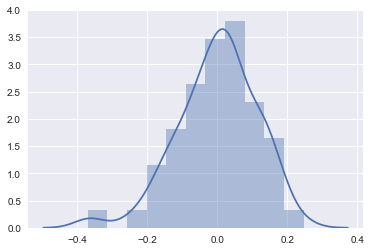

In [159]:
#plt.hist(predictions_plot[1],20, facecolor = 'green',alpha=0.75)
sns.distplot(predictions_plot[1])

In [508]:
#plt.hist(models_Forward['models_Forward_InSample']['model'].iloc[6].resid,20, facecolor = 'green',alpha=0.75)

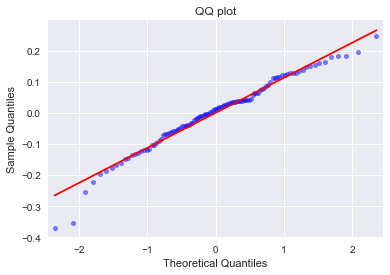

In [185]:
from statsmodels.graphics.gofplots import ProbPlot
# statsmodels Q-Q plot on model residuals
QQ = ProbPlot(predictions_plot[1])
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');
plt.savefig('qq_plot.png')

In [184]:
#from statsmodels.graphics.gofplots import ProbPlot
# statsmodels Q-Q plot on model residuals
#QQ = ProbPlot(models_Forward['models_Forward_InSample']['model'].iloc[6].resid)
#fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
#plt.title('QQ plot');

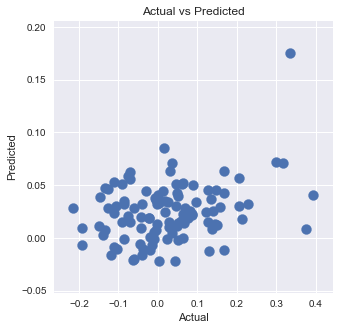

In [511]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))
# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#ax.set_xlim(0, 0.4)
#ax.set_ylim(0, 0.4)
ax.scatter(y_test,predictions_plot[0])

In [512]:
combine1 = pd.DataFrame(y_test,index = y_test.index)
combine2 = pd.DataFrame(predictions_plot[0], index =predictions_plot[0].index)
data_plot = pd.merge(combine1, combine2, right_index = True, left_index = True)
data_plot.sort_index(axis=0,ascending = True,inplace=True)
data_plot.rename(columns={0:'predictions'}, inplace = True)

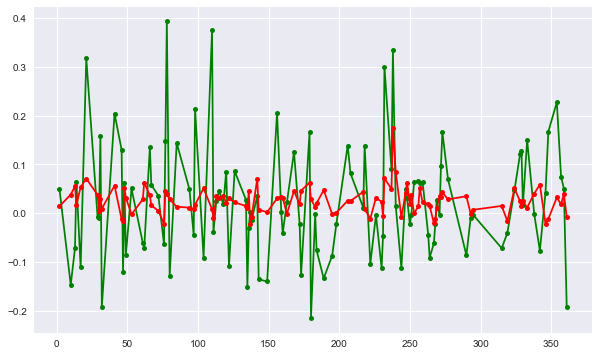

In [514]:
plt.figure(figsize=(10,6))
plt.plot(data_plot['target_return'], color='green',marker='.')
plt.plot(data_plot['predictions'], color='red',marker='.')
plt.show()

# Normality of the residuals

Jarque-Bera test:

In [209]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(modelGrid5['model'].resid)
lzip(name, test)

[('Jarque-Bera', 4.327331684424893),
 ('Chi^2 two-tail prob.', 0.11490313128769787),
 ('Skew', 0.02119395984200451),
 ('Kurtosis', 3.644434228460779)]

# Heteroskedasticity tests
Breush-Pagan test:

In [161]:
#modelGrid5['model']
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(modelGrid5['model'].resid, modelGrid5['model'].model.exog)
pd.DataFrame(name,test)

/Users/Ludwe/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


,0
9.638879,Lagrange multiplier statistic
0.086138,p-value
1.957083,f-value
0.085705,f p-value


In [516]:
#White's test of heteroscedasticity 

Since our p-value is less than 0.05, this indicates that heteroscedasticity is present, and we reject the null hypothesis of homoscedasticity.

# Goldfeld-Quandt test

In [163]:
name = ['F statistic', 'p-value']
#test = sms.het_goldfeldquandt(models_Grid['models_InSample']['model'].iloc[3].resid, models_Forward['models_Forward_InSample']['model'].iloc[6].model.exog)
test = sms.het_goldfeldquandt(modelGrid5['model'].resid, modelGrid5['model'].model.exog)
modelGrid5['model'].resid
lzip(name, test)

[('F statistic', 0.84837363980741332), ('p-value', 0.81386758477884458)]

# Autocorrelation Test


In [164]:
#durbinwatson = sm.stats.stattools.durbin_watson(models_Grid['models_InSample']['model'].iloc[3].resid, axis=0)
durbinwatson = sm.stats.stattools.durbin_watson(modelGrid5['model'].resid, axis=0)
print(durbinwatson)

2.02118941029


In [519]:
#breusch_godfrey = sm.stats.diagnostic.acorr_breusch_godfrey(models_Forward['models_Forward_InSample']['model'].iloc[6].resid)
#print(breusch_godfrey)

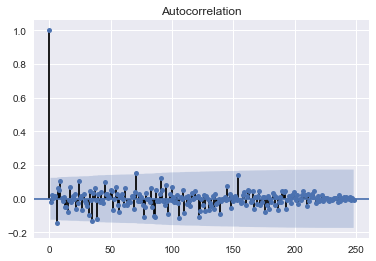

In [186]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(models_Grid['models_InSample']['model'].iloc[5].resid)
plot_acf(modelGrid5['model'].resid)
#plt.savefig('autocorrelation.png')
pyplot.show()


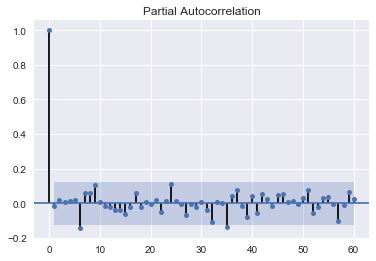

In [166]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(models_Grid['models_InSample']['model'].iloc[3].resid, lags=60)
plot_pacf(modelGrid5['model'].resid, lags=60)
pyplot.show()

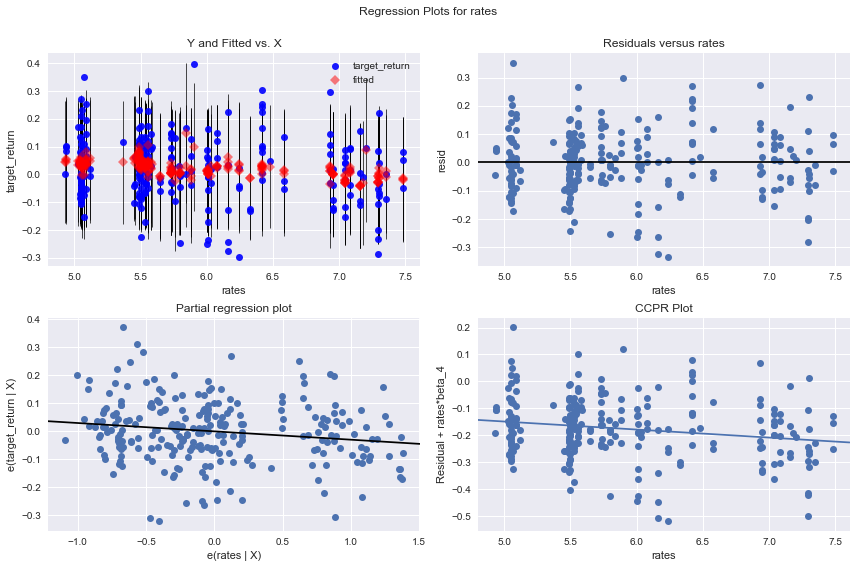

In [168]:
#Observing the relationship between rates and returns
fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(models_Forward['models_Forward_InSample']['model'].iloc[6], "rates", fig=fig)
fig = sm.graphics.plot_regress_exog(modelGrid5['model'], "rates", fig=fig)

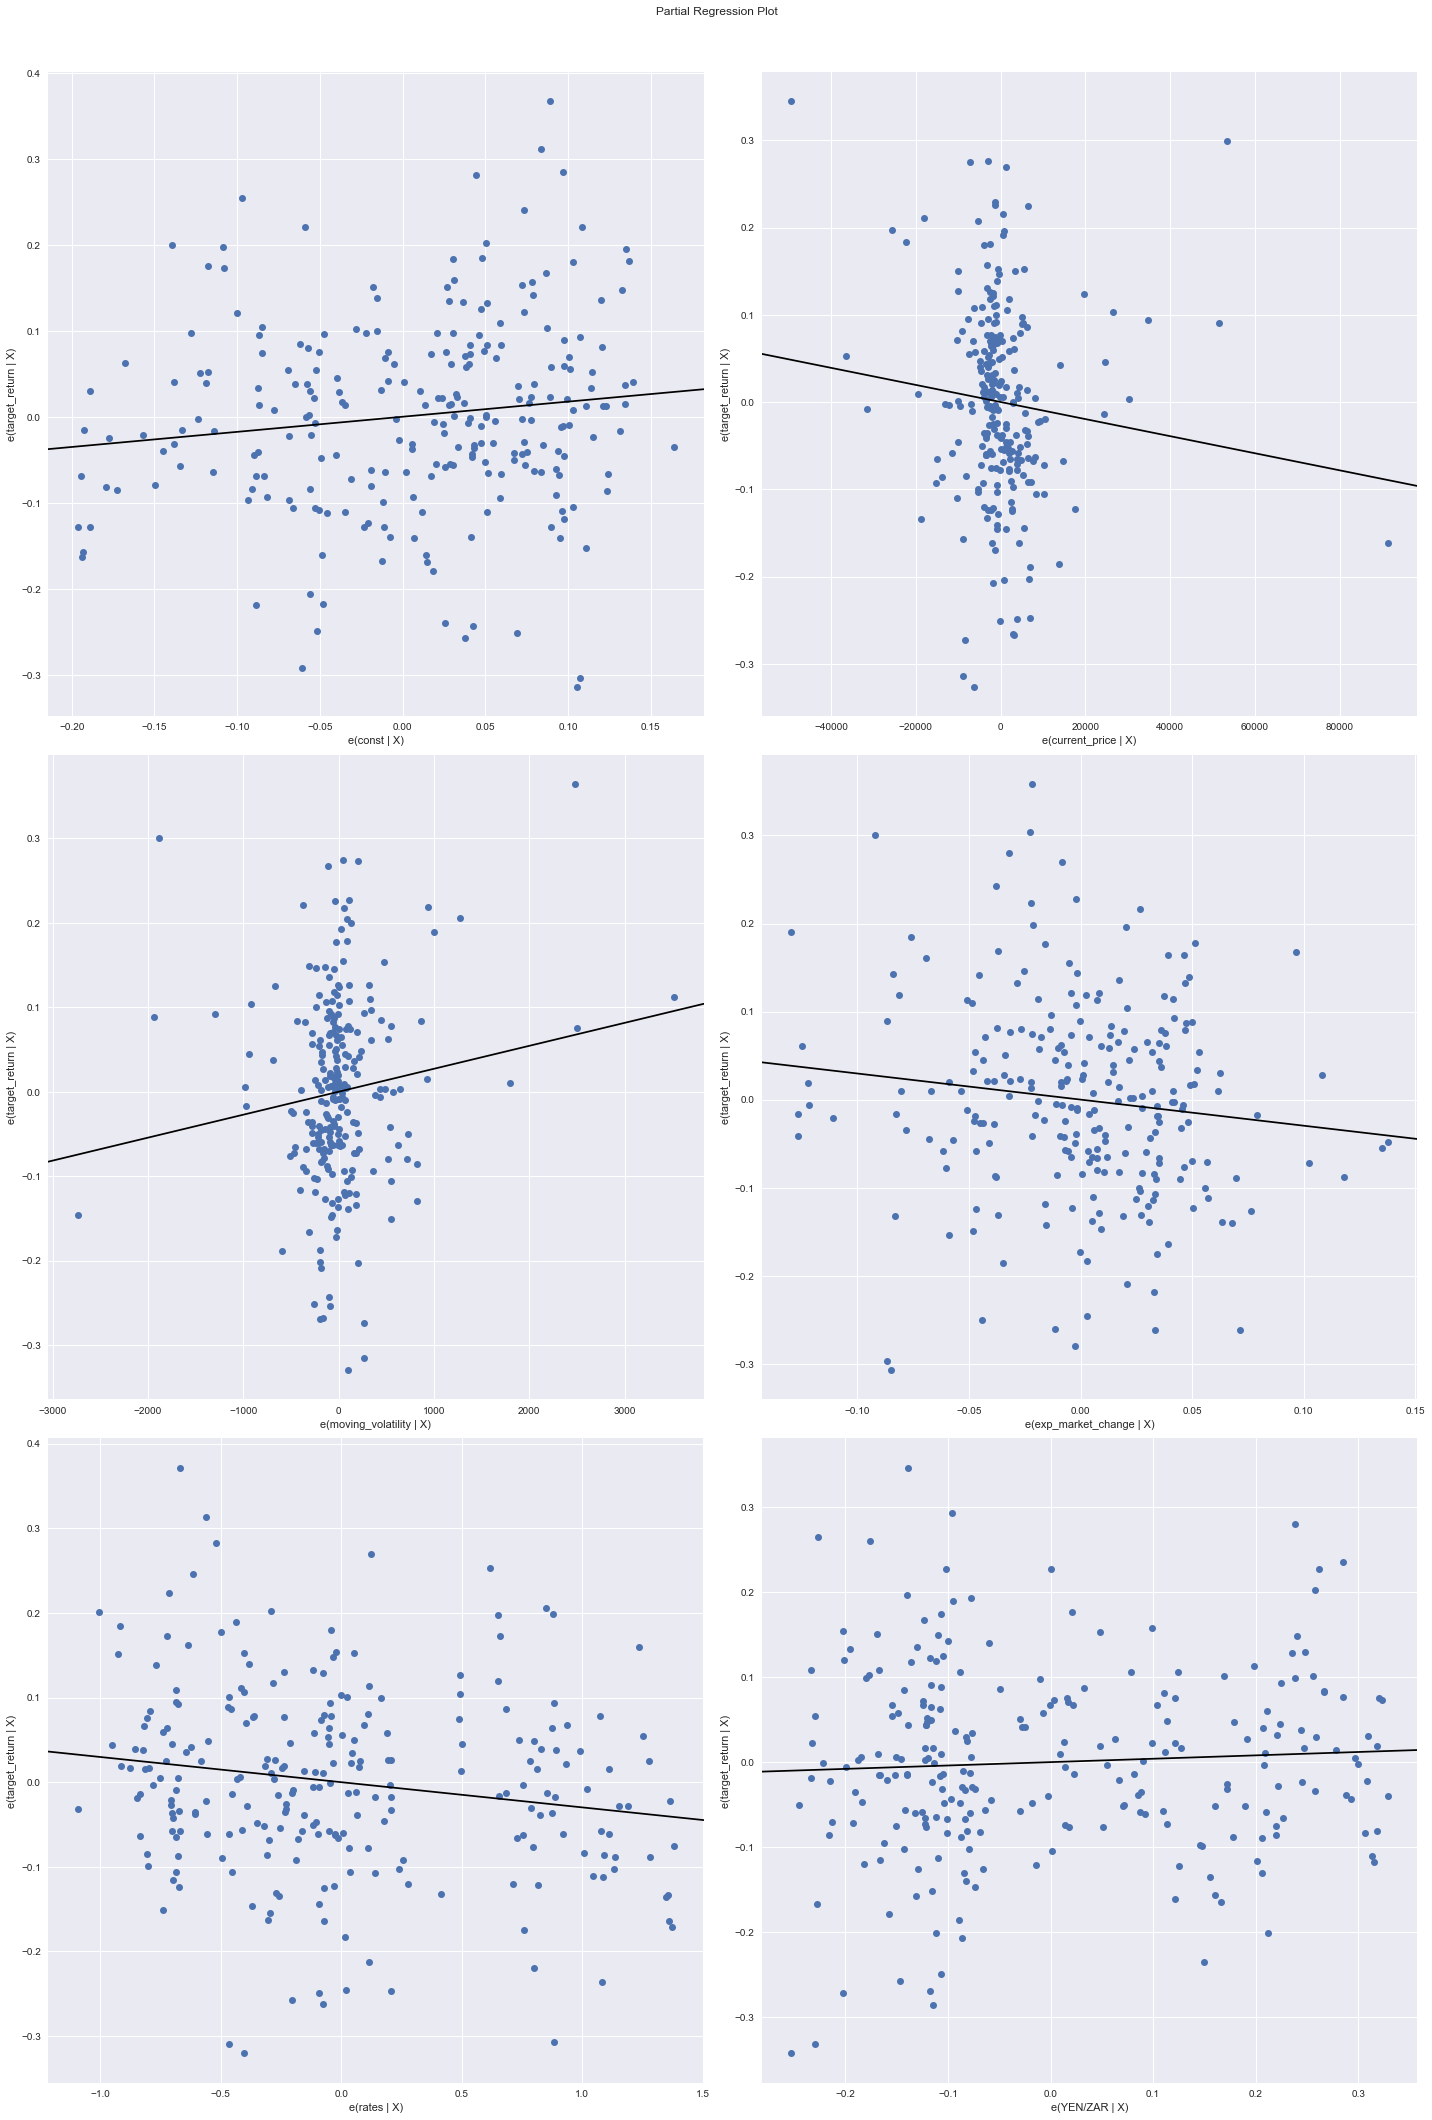

In [171]:
fig = plt.figure(figsize=(20,30))
#fig = sm.graphics.plot_partregress_grid(models_Grid['models_InSample']['model'].iloc[3], fig=fig)
fig = sm.graphics.plot_partregress_grid(modelGrid5['model'], fig=fig)
#plt.savefig('partial.png')

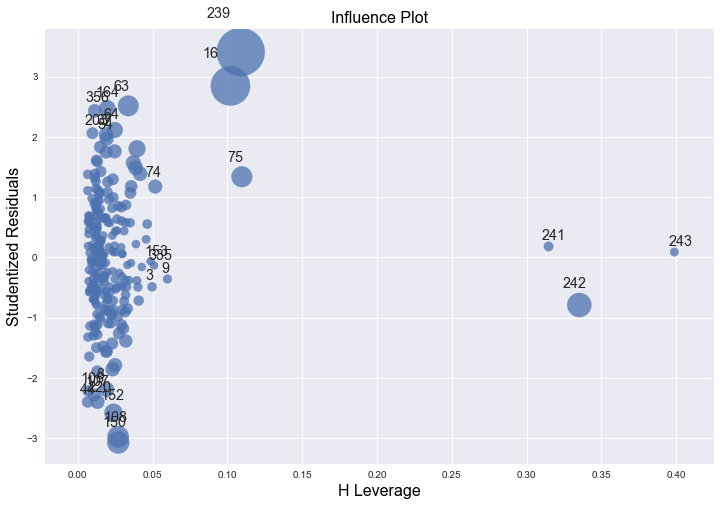

In [173]:
fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(models_Grid['models_InSample']['model'].iloc[3], ax=ax, criterion="cooks")
fig = sm.graphics.influence_plot(modelGrid5['model'], ax=ax, criterion="cooks")
#plt.savefig('influencial_plot.png')

# More tests ....

# Multi-colinearity tests#sm.stats.outliers_influence.variance_inflation_factor(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor


steps for Implementing VIF

Run a multiple regression.
Calculate the VIF factors.
Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

In [151]:
df_colinearity = X.ix[:, ['current_price', 'moving_volatility','exp_market_change','rates','YEN/ZAR']] 
#df_colinearity

In [106]:
type(df_colinearity)

pandas.core.frame.DataFrame

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_colinearity.values, i) for i in range(df_colinearity.shape[1])]
vif["features"] = df_colinearity.columns
vif

,VIF Factor,features
0,6.634225,current_price
1,6.267842,moving_volatility
2,1.158540,exp_market_change
3,11.679752,rates
4,10.938472,YEN/ZAR


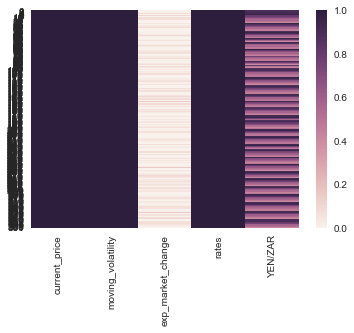

In [174]:
# Draw a heatmap with the numeric values in each cell
sns.heatmap(df_colinearity, vmin=0, vmax=1)
plt.savefig('heat_plot.png')

In [109]:
df_colinearity.corr()

,current_price,moving_volatility,exp_market_change,rates,YEN/ZAR
current_price,1.000000,0.869837,-0.016559,0.014642,-0.135257
moving_volatility,0.869837,1.000000,-0.076320,0.061574,-0.174476
exp_market_change,-0.016559,-0.076320,1.000000,-0.371300,-0.041225
rates,0.014642,0.061574,-0.371300,1.000000,-0.297252
YEN/ZAR,-0.135257,-0.174476,-0.041225,-0.297252,1.000000


In [112]:
# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(df_colinearity, annot=True, linewidths=.5, ax=ax)

In [113]:
corr= np.corrcoef(df_colinearity,rowvar=0)
corr

In [218]:
W,V=np.linalg.eig(corr)
W    

array([  1.10232786e+01,   3.88107376e+00,   2.14979540e+00,
         1.31268100e+00,   9.25175299e-01,   5.24509041e-01,
         3.86785635e-01,   2.23830964e-01,   1.71606707e-01,
         1.81210503e-01,   7.96665744e-02,   4.23031005e-02,
         3.47053010e-02,   2.36465055e-02,   1.69688464e-02,
         1.12178709e-02,   5.41915300e-03,   3.48942284e-03,
         1.11254121e-03,   1.52358602e-03,   2.17837658e-07])

# PCA


In [141]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train[list_of_features])
X_test_pca = sc.transform(X_test[list_of_features])
# Applying PCA
pca_4 = PCA(n_components = 4)
Xtrain = pca_4.fit_transform(X_train_pca)
Xtrain_df = pd.DataFrame(Xtrain)
Xtest = pca_4.transform(X_test_pca)
explained_variance = pca_4.explained_variance_ratio_
explained_variance

array([ 0.41416677,  0.28492095,  0.1925356 ,  0.08500688])

In [178]:
def pca_components_1():
    fig , ax1 = plt.subplots(figsize=(9,7))

    ax1.set_xlim(-1.5,1.5)
    ax1.set_ylim(-1.5,1.5)

    # Plot Principal Components 1 and 2
    for i in Xtrain_df.index:
        ax1.annotate('o', (-Xtrain_df[0].loc[i], -Xtrain_df[1].loc[i]), ha='center')
    
    
    # Plot reference lines
    ax1.hlines(0,-1.5,1.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-1.5,1.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component') 

    # Plot Principal Component loading vectors, using a second y-axis.
    ax2 = ax1.twinx().twiny() 

    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel('Principal Component loading vectors', color='red')


    for i in Xtrain_df[:2].index:
        ax2.annotate(i, (-Xtrain_df[0].loc[i], -Xtrain_df[1].loc[i]), color='red')

    # vectors
    ax2.arrow(0,0,-Xtrain_df[0][0], -Xtrain_df[1][0], color='red')
    #ax2.arrow(0,0,-Xtrain_df[0][1], -Xtrain_df[1][1], color='blue')
    ax2.arrow(0,0,-Xtrain_df[0][2], -Xtrain_df[1][2], color='green')
    #ax2.arrow(0,0,-Xtrain_df[0][3], -Xtrain_df[1][3], color='yellow')
    #ax2.arrow(0,0,-Xtrain_df[0][4], -Xtrain_df[1][4], color='pink')


In [179]:
def pca_components_3():
    
    fig , ax1 = plt.subplots(figsize=(9,7))

    ax1.set_xlim(-1.5,1.5)
    ax1.set_ylim(-1.5,1.5)

    # Plot Principal Components 3 and 4
    for i in Xtrain_df.index:
        ax1.annotate('o', (-Xtrain_df[2].loc[i], -Xtrain_df[2].loc[i]), ha='center')
    
    
    # Plot reference lines
    ax1.hlines(0,-1.5,1.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-1.5,1.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('Third Principal Component')
    ax1.set_ylabel('Fourth Principal Component') 

    # Plot Principal Component loading vectors, using a second y-axis.
    ax2 = ax1.twinx().twiny() 

    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel('Principal Component loading vectors', color='red')

    # Plot labels for vectors. 
    for i in Xtrain_df[2:4].index:
        ax2.annotate(i, (-Xtrain_df[2].loc[i], -Xtrain_df[3].loc[i]), color='red')

    # Plot vectors
    ax2.arrow(0,0,-Xtrain_df[2][0], -Xtrain_df[3][0], color='red')
    ax2.arrow(0,0,-Xtrain_df[2][1], -Xtrain_df[3][1], color='blue')
    ax2.arrow(0,0,-Xtrain_df[2][2], -Xtrain_df[3][2], color='green')
    #ax2.arrow(0,0,-Xtrain_df[2][3], -Xtrain_df[3][3], color='yellow')
    #ax2.arrow(0,0,-Xtrain_df[2][4], -Xtrain_df[3][4], color='pink')

([<matplotlib.axis.XTick at 0x123f1f9e8>,
 <a list of 4 Text xticklabel objects>)

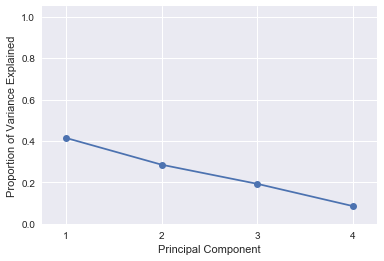

In [180]:
plt.plot([1,2,3,4], pca_4.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x1241b3668>,
 <a list of 4 Text xticklabel objects>)

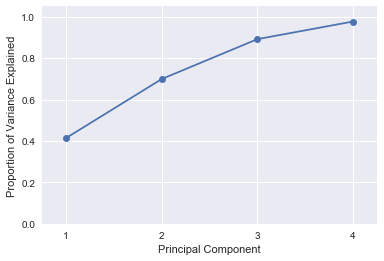

In [181]:
plt.plot([1,2,3,4], np.cumsum(pca_4.explained_variance_ratio_), '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])


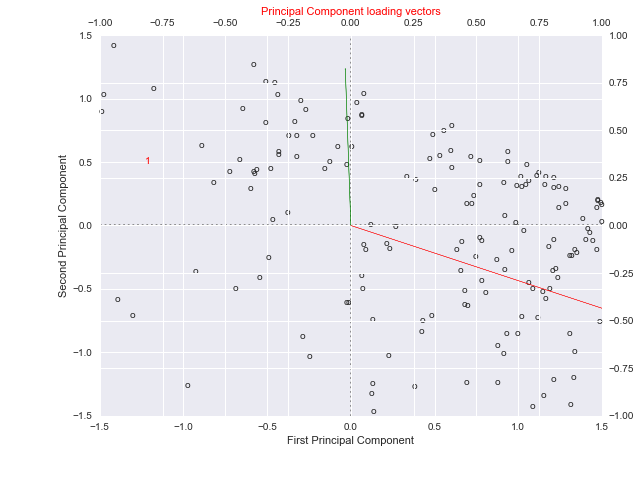

In [182]:
pca_components_1()
plt.savefig('PCA.png')

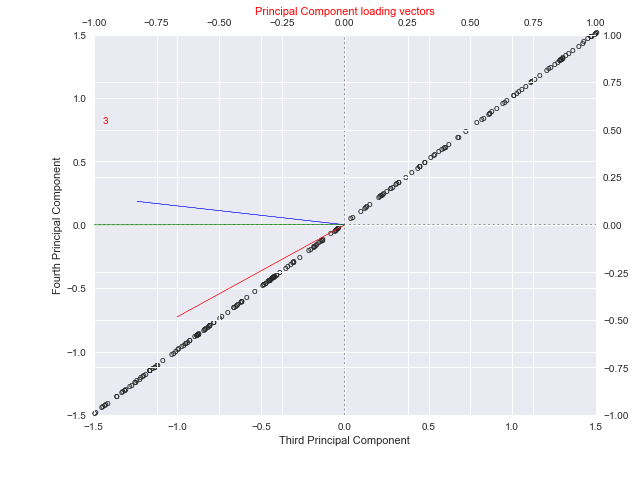

In [148]:
pca_components_3()

In [194]:
def pca(principal_components_train,principal_components_test):
    
    # Fit model on the predictors and calculate RSS     
    model = sm.OLS(y_train,principal_components_train)
    reg_pca = model.fit()
    predictions = reg_pca.predict(principal_components_test)
    
    #Statistics of interest
    MSE = metrics.mean_squared_error(y_test,predictions)
    RSS = ((predictions - y_test) ** 2).sum()
    
    return {"RSS on Testing":RSS, "MSE on Testing":MSE,"model":reg_pca}

In [199]:
def Out_of_Sample_Testing_pca(model):

    #df_temp = pd.DataFrame(X_test[keys])
    
    predictions = model.predict(Xtest)

    MSE = metrics.mean_squared_error(y_test,predictions)

    RSS = ((predictions  - y_test) ** 2).sum()
    R2 = r2_score(y_test,predictions)
    R2_adj = adj_r2_score_regr(model,y_test,predictions)
    
    return [RSS,MSE,R2,R2_adj]  

In [202]:
pca_final_model = pca(Xtrain,Xtest)
pca_final_model
Out_of_Sample_Testing_pca(pca_final_model['model'])
#RSS
#MSE
#R2
#R2_adj

[1.4930528870876063,
 0.013824563769329688,
 0.021311575066580324,
 -0.016695742406562131]

In [208]:
modelGrid5

MSE on Testing                                            0.0126682
RSS on Testing                                              1.36817
model             <statsmodels.regression.linear_model.Regressio...
Name: 1917, dtype: object

# Conculsion
The initial sub select model is still the better in comparison to PCA